In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import sys

sys.path.append("..")

import Models.OWID as owid


from scipy.stats import lognorm

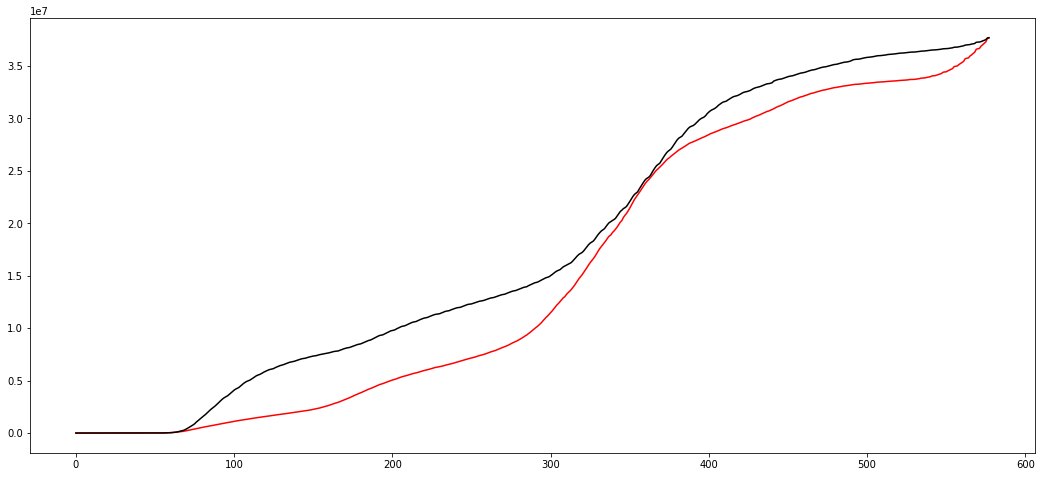

In [2]:
dates, countryData = owid.LoadCountry("United States", selectColumns=[4, 5, 7, 25, 35, 46])
[totalI, newI, D, tests, V, pop] = countryData
pop=pop[0]

fig,ax = plt.subplots(figsize=(18,8))
ax.plot(totalI, color="red")
ax.plot(D*60, color="black")

## Lognormal curves

The paper doesn't indicate how to take a mean and median to get the standard deviation, so a simple linear serach is used.

Paper: https://www.nature.com/articles/s41598-021-90051-7

NameError: name 'dr' is not defined

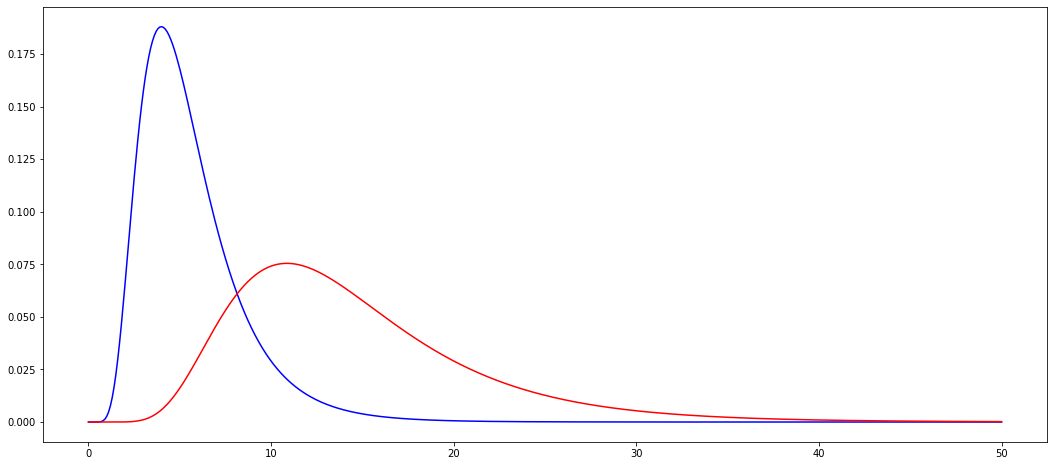

In [4]:
def getLogNorm(xData, mean, median, iters=250):
    
    minStd = .1
    maxStd = .6
    
    std = 0
    bestMean = 0
    stdList = np.arange(minStd, maxStd,(minStd+maxStd)/iters)
    for currStd in stdList: #basic search
        #figure out mean based on std and median
        yData = lognorm.pdf(xData,currStd,scale=median)
        yDataMod = yData/sum(yData) #normalized
        currMean = sum(yDataMod*xData)
        
        if(abs(currMean-mean) < abs(bestMean-mean)):
            bestMean = currMean
            std = currStd

    yData = lognorm.pdf(xData,std,scale=median)
    yDataMod = yData/sum(yData) #normalized
    currMean = sum(yDataMod*xData)
    #print(std, currMean, mean)
    
    return yData

meanRaw = 0.954

xData = np.linspace(0,50,500)

fig, ax = plt.subplots(figsize=(18,8))

ip = getLogNorm(xData, 5.6,5)
iod = getLogNorm(xData, 14.5,13.2)
drApprox = getLogNorm(xData, 20.08,18.8)
dp = np.convolve(ip, iod, mode="same") * (xData[1]-xData[0]) #curves * dx

ax.plot(xData, ip, color="blue")
ax.plot(xData, iod, color="red")
ax.plot(xData, dr, color="green")
ax.plot(xData, drApprox, color="black", linestyle="dashed")

ax.set_ylim([0,.2])
ax.set_xlim([0,50])

fDist = 1

2020-03-13
2020-03-13
2020-03-13


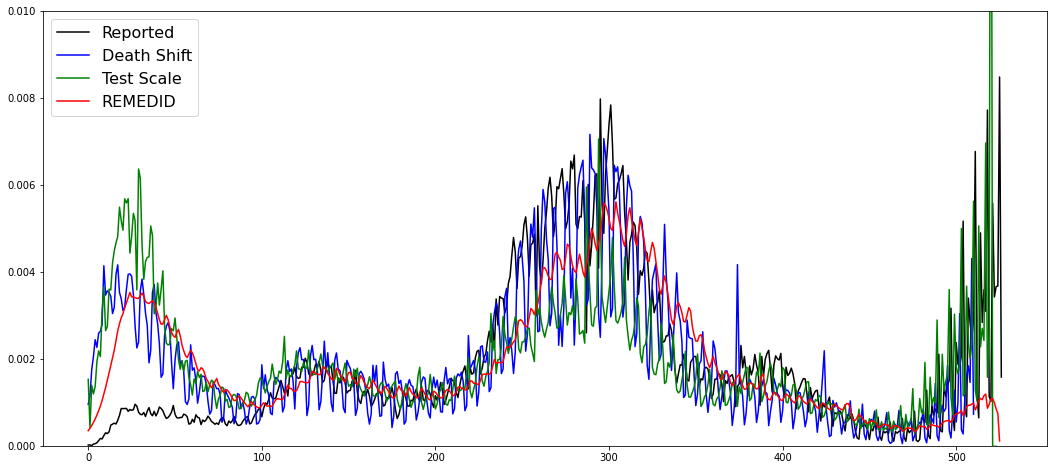

In [5]:
xData = np.linspace(0,100,100)
ip = getLogNorm(xData, 5.6,5)
iod = getLogNorm(xData, 14.5,13.2)
dp = np.convolve(ip, iod, mode="same") * (xData[1]-xData[0]) #curves mergede * dx, dx should probably be 1

newD = np.diff(D)
approxI = np.zeros(len(newD))
for i in range(len(newD)-len(dp)+1):
    approxI[i] = sum(newD[i:i+len(dp)]*dp)
for i in range(1,len(dp)):
    approxI[len(newD)-len(dp)+i] = sum(newD[len(newD)-len(dp)+i:]*dp[:-i])
    

    
dates, countryData = owid.LoadCountry("United States", selectColumns=[4, 5, 7, 25, 35, 46])
[totalI, newI, D, tests, V, pop] = countryData
pop=pop[0]    

dates2, I2, R2, D2, V2, totI2 = owid.LoadCountryNormal("United States")
newI2 = np.diff(I2+R2)

dates3, I3, R3, D3, V3, totI3 = owid.LoadCountryNormalDeaths("United States")
newI3 = np.diff(I3+R3)

#sync dates manually, to compare methods
print(dates2[8])
print(dates3[0])
print(dates[51])
approxI = approxI[51:]
newI = newI[51:]
newI2 = newI2[8:]
newI3 = newI3[0:]
    
fig,ax = plt.subplots(figsize=(18,8))
#ax.plot(newD, color="black")
ax.plot(newI/np.sum(newI), color="black", label="Reported")
ax.plot(newI3/np.sum(newI3), color="blue", label="Death Shift")
ax.plot(newI2/np.sum(newI2), color="green", label="Test Scale")
ax.plot(approxI/np.sum(approxI), color="red", label="REMEDID")

ax.set_ylim([0,.01])
leg = ax.legend(fontsize="16")

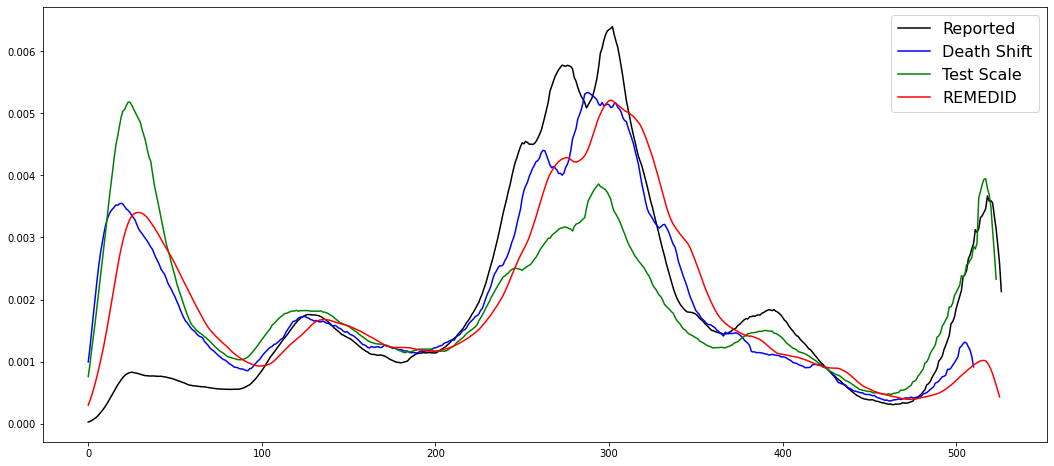

In [6]:
def smoothCurve(xData): #Apply a convolution kernel to the data, 15 day window
    x = np.arange(-7, 8)
    kernel2 = np.exp(-(x) ** 2 / (2 * 5 ** 2)) #The middle term on the right is the sigma value
    kernel2=kernel2/sum(kernel2)
    return np.convolve(xData, kernel2, 'same')


fig,ax = plt.subplots(figsize=(18,8))
#ax.plot(newD, color="black")
ax.plot(smoothCurve(newI/np.sum(newI)), color="black", label="Reported")
ax.plot(smoothCurve(newI3/np.sum(newI3)), color="blue", label="Death Shift")
ax.plot(smoothCurve(newI2/np.sum(newI2)), color="green", label="Test Scale")
ax.plot(smoothCurve(approxI/np.sum(approxI)), color="red", label="REMEDID")

leg = ax.legend(fontsize="16")

..\Models\OWID.py:64: RuntimeWarning: divide by zero encountered in double_scalars
  I = I * (.25/(max(I))) #adjust so it matches max = .1, this is arbitrary
..\Models\OWID.py:64: RuntimeWarning: invalid value encountered in multiply
  I = I * (.25/(max(I))) #adjust so it matches max = .1, this is arbitrary


2020-03-01
2020-03-01
2020-03-01


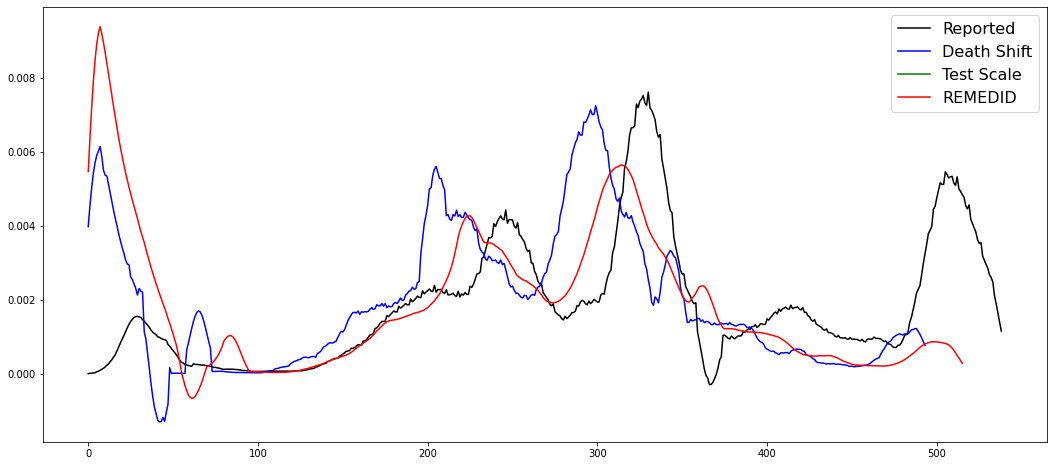

In [17]:
dates, countryData = owid.LoadCountry("Spain", selectColumns=[4, 5, 7, 25, 35, 46])
[totalI, newI, D, tests, V, pop] = countryData
pop=pop[0]    

dates2, I2, R2, D2, V2, totI2 = owid.LoadCountryNormal("Spain")
newI2 = np.diff(I2+R2)

dates3, I3, R3, D3, V3, totI3 = owid.LoadCountryNormalDeaths("Spain")
newI3 = np.diff(I3+R3)


xData = np.linspace(0,100,100)
ip = getLogNorm(xData, 5.6,5)
iod = getLogNorm(xData, 14.5,13.2)
dp = np.convolve(ip, iod, mode="same") * (xData[1]-xData[0]) #curves mergede * dx, dx should probably be 1

newD = np.diff(D)
approxI = np.zeros(len(newD))
for i in range(len(newD)-len(dp)+1):
    approxI[i] = sum(newD[i:i+len(dp)]*dp)
for i in range(1,len(dp)):
    approxI[len(newD)-len(dp)+i] = sum(newD[len(newD)-len(dp)+i:]*dp[:-i])




#sync dates manually, to compare methods
print(dates2[29])
print(dates3[0])
print(dates[29])
approxI = approxI[51:]
newI = newI[29:]
newI2 = newI2[0:]
newI3 = newI3[29:]
    
fig,ax = plt.subplots(figsize=(18,8))
#ax.plot(newD, color="black")
#ax.plot(newI/np.sum(newI), color="black", label="Reported")
#ax.plot(newI3/np.sum(newI3), color="blue", label="Death Shift")
#ax.plot(newI2/np.sum(newI2), color="green", label="Test Scale")
#ax.plot(approxI/np.sum(approxI), color="red", label="REMEDID")

#ax.set_ylim([0,.01])


#ax.plot(newD, color="black")
ax.plot(smoothCurve(newI/np.sum(newI)), color="black", label="Reported")
ax.plot(smoothCurve(newI3/np.sum(newI3)), color="blue", label="Death Shift")
ax.plot(smoothCurve(newI2/np.sum(newI2)), color="green", label="Test Scale")
ax.plot(smoothCurve(approxI/np.sum(approxI)), color="red", label="REMEDID")



leg = ax.legend(fontsize="16")

2020-03-01
2020-03-01


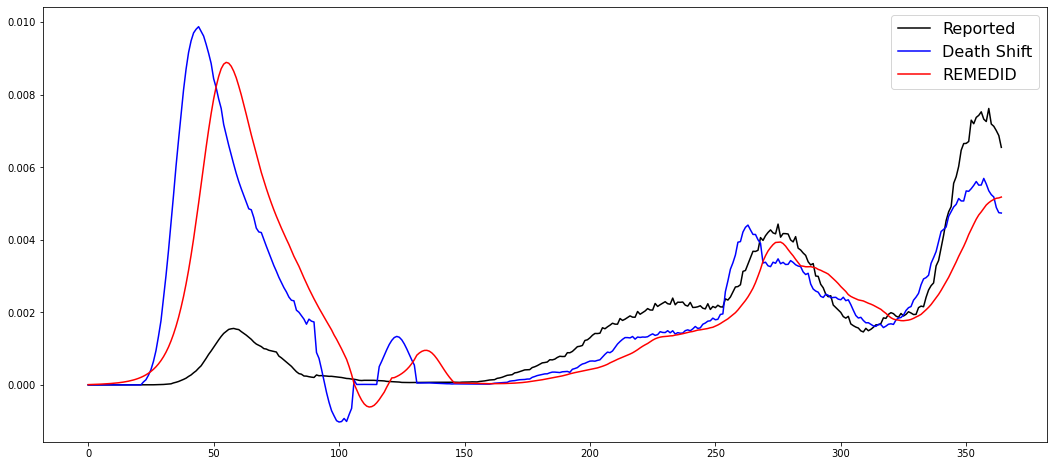

In [21]:
dates, countryData = owid.LoadCountry("Spain", selectColumns=[4, 5, 7, 25, 35, 46])
[totalI, newI, D, tests, V, pop] = countryData
pop=pop[0]    

dates3, I3, R3, D3, V3, totI3 = owid.LoadCountryNormalDeaths("Spain")
newI3 = np.diff(I3+R3)


xData = np.linspace(0,100,100)
ip = getLogNorm(xData, 5.6,5)
iod = getLogNorm(xData, 14.5,13.2)
dp = np.convolve(ip, iod, mode="same") * (xData[1]-xData[0]) #curves mergede * dx, dx should probably be 1

newD = np.diff(D)
approxI = np.zeros(len(newD))
for i in range(len(newD)-len(dp)+1):
    approxI[i] = sum(newD[i:i+len(dp)]*dp)
for i in range(1,len(dp)):
    approxI[len(newD)-len(dp)+i] = sum(newD[len(newD)-len(dp)+i:]*dp[:-i])




#sync dates manually, to compare methods
print(dates3[0])
print(dates[29])
approxI = approxI[0:]
newI = newI[0:]
newI3 = newI3[0:]


newI3Extend = np.zeros(len(newI3)+29)
newI3Extend[29:] = newI3
newI3 = newI3Extend
    
fig,ax = plt.subplots(figsize=(18,8))
#ax.plot(newD, color="black")
#ax.plot(newI/np.sum(newI), color="black", label="Reported")
#ax.plot(newI3/np.sum(newI3), color="blue", label="Death Shift")
#ax.plot(newI2/np.sum(newI2), color="green", label="Test Scale")
#ax.plot(approxI/np.sum(approxI), color="red", label="REMEDID")

#ax.set_ylim([0,.01])


#ax.plot(newD, color="black")
ax.plot(smoothCurve(newI/np.sum(newI))[:365], color="black", label="Reported")
ax.plot(smoothCurve(newI3/np.sum(newI3))[:365], color="blue", label="Death Shift")
ax.plot(smoothCurve(approxI/np.sum(approxI))[:365], color="red", label="REMEDID")



leg = ax.legend(fontsize="16")